# MathTool HW5
2024-11-29

## Question 3

### a)

In [833]:
import numpy as np
import matplotlib.pyplot as plt

In [834]:
mu_0 = 3 # 0%
mu_1 = 5 # 10%
sigma = 1 
n_trials = 1000

In [835]:
#np.random.seed(42)  
firing_rates_0 = mu_0 + sigma * np.random.randn(n_trials) #0%
firing_rates_1 = mu_1 + sigma * np.random.randn(n_trials) #10%

firing_rates_0[firing_rates_0 < 0] = 0
firing_rates_1[firing_rates_1 < 0] = 0

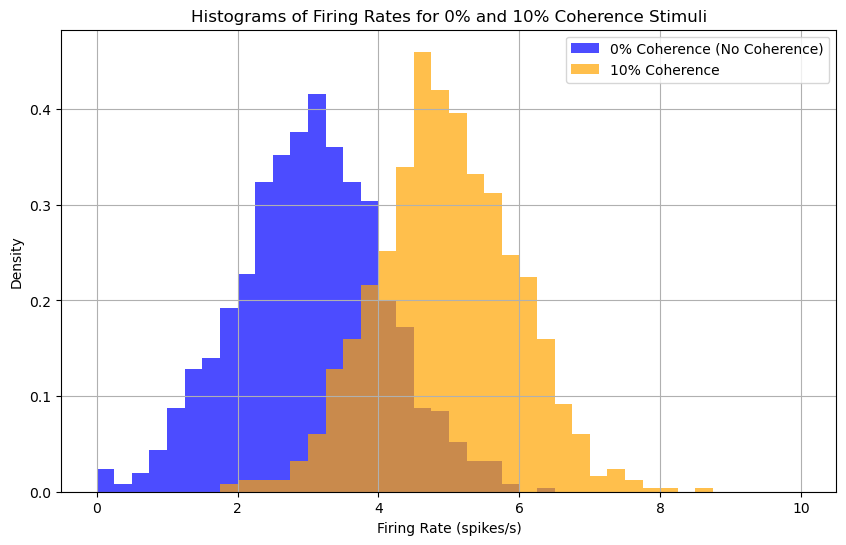

In [836]:
bins_setting = np.arange(0, 10.25, 0.25)
plt.figure(figsize=(10, 6))
plt.hist(firing_rates_0, bins=bins_setting, alpha=0.7, label="0% Coherence (No Coherence)", color="blue", density=True)
plt.hist(firing_rates_1, bins=bins_setting, alpha=0.7, label="10% Coherence", color="orange", density=True)
plt.xlabel("Firing Rate (spikes/s)")
plt.ylabel("Density")
plt.title("Histograms of Firing Rates for 0% and 10% Coherence Stimuli")
plt.legend()
plt.grid(True)
plt.show()

### b)

In [837]:
d_prime = (mu_1 - mu_0) / sigma
print(f"d' = {d_prime:.2f}")

d' = 2.00


### c）

When studying a dataset like a Gaussian distribution with equal variances, the maximum-likelihood decoder uses a threshold to evalueate the measurement, and the likelihood ratio test simplifies to comparing the firing rate against a single threshold.

In [838]:
# Data from earlier part:
all_data = np.concatenate([firing_rates_0, firing_rates_1])


In [839]:
#Prior probabilities 
P_S1_equal = 0.5  # 0% equal
P_S2_equal = 0.5  # 10% equal
P_S1_unequal = 0.25  # 0% unequal
P_S2_unequal = 0.75  # 10% unequal

In [840]:
t_min = np.min(all_data)
t_max = np.max(all_data)
n_thresholds = 100
thresholds = np.linspace(t_min, t_max, n_thresholds)

hit_rates = np.zeros(n_thresholds)
false_alarm_rates = np.zeros(n_thresholds)
percentage_correct_equal_prior = np.zeros(n_thresholds)
percentage_correct_unequal_prior = np.zeros(n_thresholds)

In [841]:
for i, t in enumerate(thresholds):
    # Hit
    hits = np.sum(firing_rates_1 >= t)
    hit_rates[i] = hits / n_trials

    # False alarm
    false_alarms = np.sum(firing_rates_0 >= t)
    correct_rejections = np.sum(firing_rates_0 < t)
    correct_rejection_rate = correct_rejections / n_trials
    false_alarm_rates[i] = false_alarms / n_trials

    # equal priors
    percentage_correct_equal_prior[i] = (
        P_S1_equal * correct_rejection_rate + P_S2_equal * hit_rates[i]
    )

    # unequal priors
    percentage_correct_unequal_prior[i] = (
        P_S1_unequal * correct_rejection_rate + P_S2_unequal * hit_rates[i]
    )

In [842]:
optimal_idx_equal_prior = np.argmax(percentage_correct_equal_prior)
threshold_equal_prior = thresholds[optimal_idx_equal_prior]

optimal_idx_unequal_prior = np.argmax(percentage_correct_unequal_prior)
threshold_unequal_prior = thresholds[optimal_idx_unequal_prior]

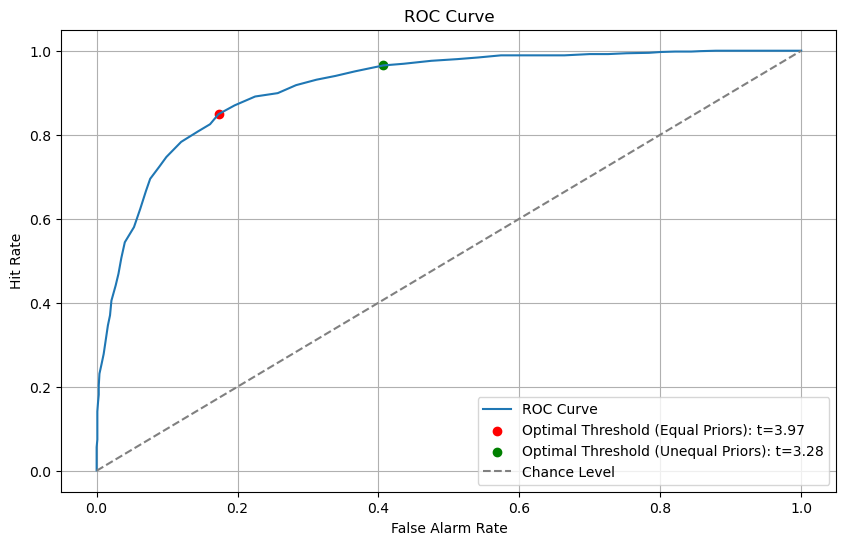

In [843]:
plt.figure(figsize=(10, 6))
plt.plot(false_alarm_rates, hit_rates, label="ROC Curve")
plt.scatter(
    false_alarm_rates[optimal_idx_equal_prior],
    hit_rates[optimal_idx_equal_prior],
    color="red",
    label=f"Optimal Threshold (Equal Priors): t={threshold_equal_prior:.2f}",
)
plt.scatter(
    false_alarm_rates[optimal_idx_unequal_prior],
    hit_rates[optimal_idx_unequal_prior],
    color="green",
    label=f"Optimal Threshold (Unequal Priors): t={threshold_unequal_prior:.2f}",
)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Chance Level")
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

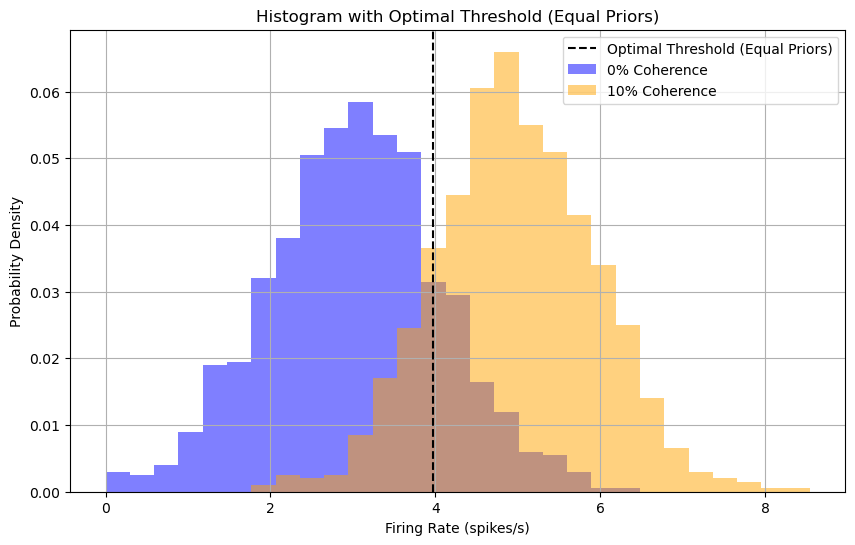

In [844]:
bin_edges = np.linspace(np.min(all_data), np.max(all_data), 30)
counts_no_coherence, _ = np.histogram(firing_rates_0, bins=bin_edges)
counts_10_coherence, _ = np.histogram(firing_rates_1, bins=bin_edges)
prob_no_coherence = counts_no_coherence / n_trials * P_S1_equal
prob_10_coherence = counts_10_coherence / n_trials * P_S2_equal
bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2

plt.figure(figsize=(10, 6))
plt.bar(
    bin_centers,
    prob_no_coherence,
    width=np.diff(bin_edges)[0],
    color="blue",
    alpha=0.5,
    label="0% Coherence",
)
plt.bar(
    bin_centers,
    prob_10_coherence,
    width=np.diff(bin_edges)[0],
    color="orange",
    alpha=0.5,
    label="10% Coherence",
)
plt.axvline(threshold_equal_prior, color="k", linestyle="--", label="Optimal Threshold (Equal Priors)")
plt.xlabel("Firing Rate (spikes/s)")
plt.ylabel("Probability Density")
plt.title("Histogram with Optimal Threshold (Equal Priors)")
plt.legend()
plt.grid(True)
plt.show()

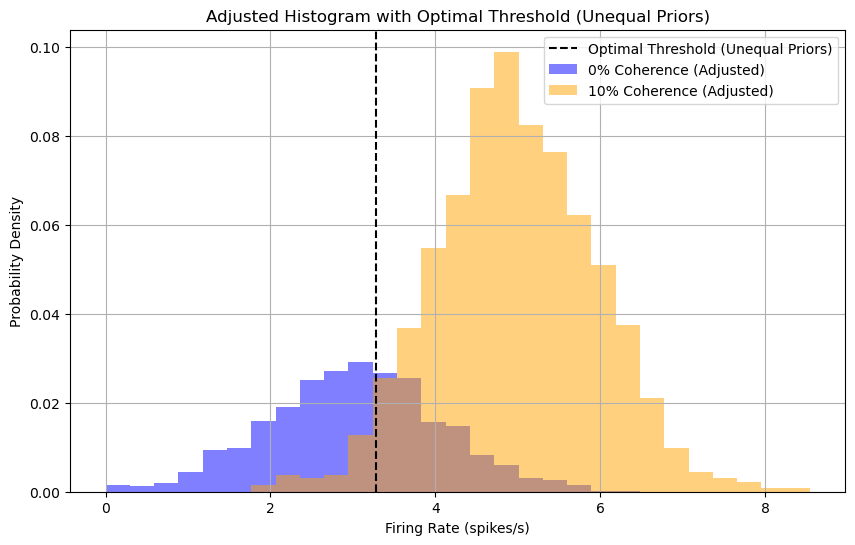

In [845]:
# unequal trials
adjusted_counts_no_coherence = counts_no_coherence * P_S1_unequal
adjusted_counts_10_coherence = counts_10_coherence * P_S2_unequal
prob_no_coherence_7525 = adjusted_counts_no_coherence / n_trials
prob_10_coherence_7525 = adjusted_counts_10_coherence / n_trials

plt.figure(figsize=(10, 6))
plt.bar(
    bin_centers,
    prob_no_coherence_7525,
    width=np.diff(bin_edges)[0],
    color="blue",
    alpha=0.5,
    label="0% Coherence (Adjusted)",
)
plt.bar(
    bin_centers,
    prob_10_coherence_7525,
    width=np.diff(bin_edges)[0],
    color="orange",
    alpha=0.5,
    label="10% Coherence (Adjusted)",
)
plt.axvline(threshold_unequal_prior, color="k", linestyle="--", label="Optimal Threshold (Unequal Priors)")
plt.xlabel("Firing Rate (spikes/s)")
plt.ylabel("Probability Density")
plt.title("Adjusted Histogram with Optimal Threshold (Unequal Priors)")
plt.legend()
plt.grid(True)
plt.show()


In [846]:
print(f"Optimal Threshold (Equal Priors) is {threshold_equal_prior:.2f}")
print(f"Optimal Threshold (Unequal Priors) is {threshold_unequal_prior:.2f}")

Optimal Threshold (Equal Priors) is 3.97
Optimal Threshold (Unequal Priors) is 3.28


From this part we can tell that When the prior is unequal, the optimal threshold will decrease.

### d）

In [847]:
from scipy.stats import norm

mu_0, mu_1 = 3, 5 
sigma_noisy = 2
n_trials = 1000 

d_prime_noisy = (mu_1 - mu_0) / sigma_noisy
print(f"New d' for the noisy neuron = {d_prime_noisy:.2f}")

New d' for the noisy neuron = 1.00


In [848]:
#np.random.seed(42)
firing_rates_0_noisy = mu_0 + sigma_noisy * np.random.randn(n_trials)
firing_rates_1_noisy = mu_1 + sigma_noisy * np.random.randn(n_trials)

In [849]:
firing_rates_0_noisy[firing_rates_0_noisy < 0] = 0
firing_rates_1_noisy[firing_rates_1_noisy < 0] = 0

In [850]:
all_data_new = np.concatenate([firing_rates_0_noisy, firing_rates_1_noisy])
thresholds_new = np.linspace(np.min(all_data_new), np.max(all_data_new), n_thresholds)

hit_rates_new = np.zeros(n_thresholds)
false_alarm_rates_new = np.zeros(n_thresholds)
percentage_correct_equal_prior_new = np.zeros(n_thresholds)
percentage_correct_unequal_prior_new = np.zeros(n_thresholds)


In [851]:
for i, t in enumerate(thresholds_new):
    # Hit rate (10% coherence)
    hits_new = np.sum(firing_rates_1_noisy >= t)
    hit_rates_new[i] = hits_new / n_trials

    # False alarm rate (0% coherence)
    false_alarms_new = np.sum(firing_rates_0_noisy >= t)
    correct_rejections_new = np.sum(firing_rates_0_noisy < t)
    correct_rejection_rate_new = correct_rejections_new / n_trials
    false_alarm_rates_new[i] = false_alarms_new / n_trials

    percentage_correct_equal_prior_new[i] = (
        P_S1_equal * correct_rejection_rate_new + P_S2_equal * hit_rates_new[i]
    )

    percentage_correct_unequal_prior_new[i] = (
        P_S1_unequal * correct_rejection_rate_new + P_S2_unequal * hit_rates_new[i]
    )


In [852]:
optimal_idx_equal_prior_new = np.argmax(percentage_correct_equal_prior_new)
threshold_equal_prior_new = thresholds_new[optimal_idx_equal_prior_new]

optimal_idx_unequal_prior_new = np.argmax(percentage_correct_unequal_prior_new)
threshold_unequal_prior_new = thresholds_new[optimal_idx_unequal_prior_new]

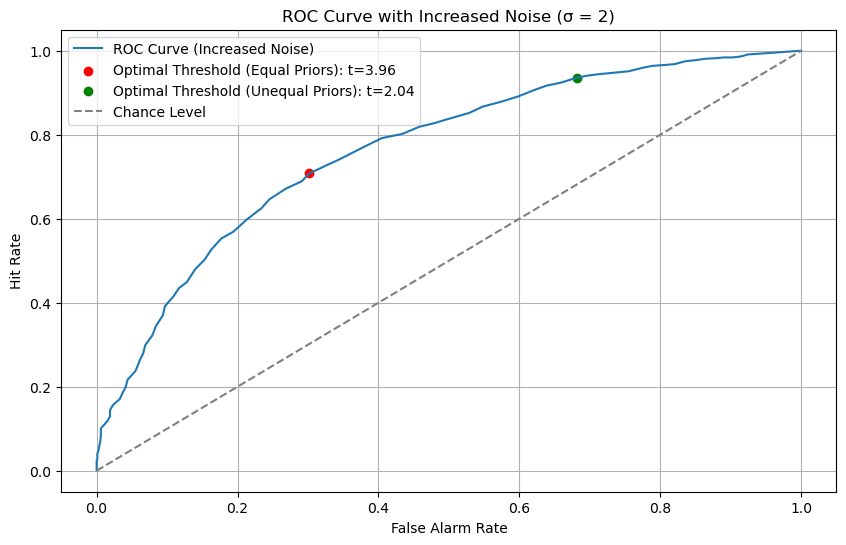

In [853]:
plt.figure(figsize=(10, 6))
plt.plot(false_alarm_rates_new, hit_rates_new, label="ROC Curve (Increased Noise)")
plt.scatter(
    false_alarm_rates_new[optimal_idx_equal_prior_new],
    hit_rates_new[optimal_idx_equal_prior_new],
    color="red",
    label=f"Optimal Threshold (Equal Priors): t={threshold_equal_prior_new:.2f}",
)
plt.scatter(
    false_alarm_rates_new[optimal_idx_unequal_prior_new],
    hit_rates_new[optimal_idx_unequal_prior_new],
    color="green",
    label=f"Optimal Threshold (Unequal Priors): t={threshold_unequal_prior_new:.2f}",
)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Chance Level")
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
plt.title("ROC Curve with Increased Noise (\u03C3 = 2)")
plt.legend()
plt.grid(True)
plt.show()

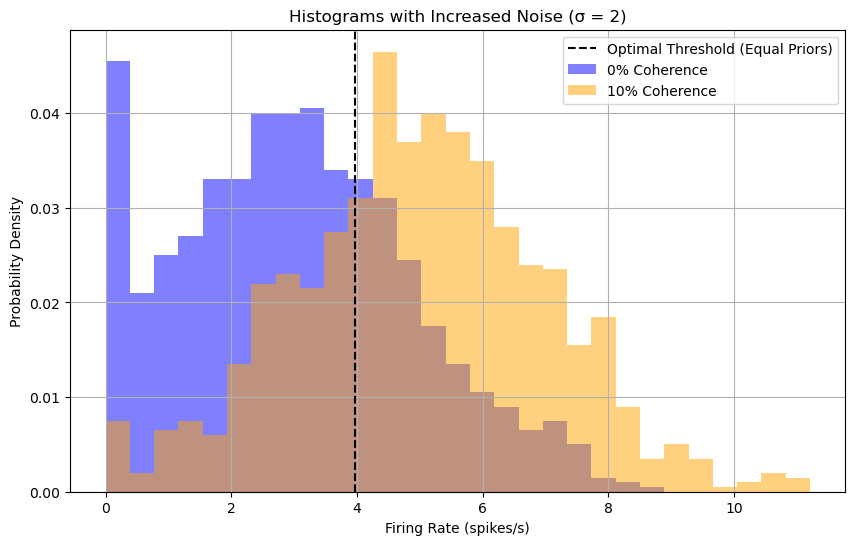

In [854]:
bin_edges_new = np.linspace(np.min(all_data_new), np.max(all_data_new), 30)
counts_no_coherence_new, _ = np.histogram(firing_rates_0_noisy, bins=bin_edges_new)
counts_10_coherence_new, _ = np.histogram(firing_rates_1_noisy, bins=bin_edges_new)

prob_no_coherence_5050 = counts_no_coherence_new / n_trials * P_S1_equal
prob_10_coherence_5050 = counts_10_coherence_new / n_trials * P_S2_equal
bin_centers_new = bin_edges_new[:-1] + np.diff(bin_edges_new) / 2

plt.figure(figsize=(10, 6))
plt.bar(
    bin_centers_new,
    prob_no_coherence_5050,
    width=np.diff(bin_edges_new)[0],
    color="blue",
    alpha=0.5,
    label="0% Coherence",
)
plt.bar(
    bin_centers_new,
    prob_10_coherence_5050,
    width=np.diff(bin_edges_new)[0],
    color="orange",
    alpha=0.5,
    label="10% Coherence",
)
plt.axvline(threshold_equal_prior_new, color="k", linestyle="--", label="Optimal Threshold (Equal Priors)")
plt.xlabel("Firing Rate (spikes/s)")
plt.ylabel("Probability Density")
plt.title("Histograms with Increased Noise (\u03C3 = 2)")
plt.legend()
plt.grid(True)
plt.show()

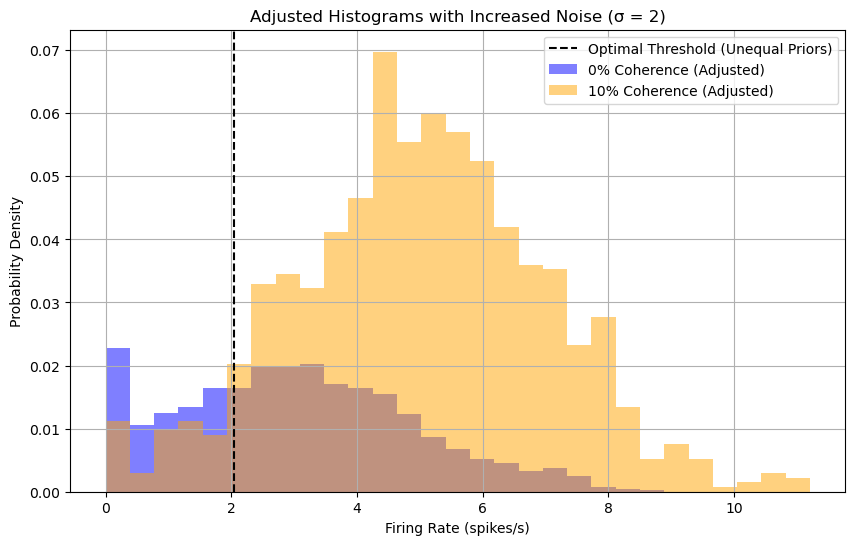

In [855]:
adjusted_counts_no_coherence_new = counts_no_coherence_new * P_S1_unequal
adjusted_counts_10_coherence_new = counts_10_coherence_new * P_S2_unequal
prob_no_coherence_7525 = adjusted_counts_no_coherence_new / n_trials
prob_10_coherence_7525 = adjusted_counts_10_coherence_new / n_trials

plt.figure(figsize=(10, 6))
plt.bar(
    bin_centers_new,
    prob_no_coherence_7525,
    width=np.diff(bin_edges_new)[0],
    color="blue",
    alpha=0.5,
    label="0% Coherence (Adjusted)",
)
plt.bar(
    bin_centers_new,
    prob_10_coherence_7525,
    width=np.diff(bin_edges_new)[0],
    color="orange",
    alpha=0.5,
    label="10% Coherence (Adjusted)",
)
plt.axvline(threshold_unequal_prior_new, color="k", linestyle="--", label="Optimal Threshold (Unequal Priors)")
plt.xlabel("Firing Rate (spikes/s)")
plt.ylabel("Probability Density")
plt.title("Adjusted Histograms with Increased Noise (\u03C3 = 2)")
plt.legend()
plt.grid(True)
plt.show()


In [856]:
print(f"Optimal Threshold (Equal Priors) with Increased Noise: {threshold_equal_prior_new:.2f}")
print(f"Optimal Threshold (Unequal Priors) with Increased Noise: {threshold_unequal_prior_new:.2f}")

Optimal Threshold (Equal Priors) with Increased Noise: 3.96
Optimal Threshold (Unequal Priors) with Increased Noise: 2.04


### e)

The new d-prime for expected spike counts of 3 and 5 are:
$$
d = \frac{\lvert \lambda_2 - \lambda_1 \rvert}{\sqrt{\lambda_2 + \lambda_1}} = \frac{1}{\sqrt{2}} \approx 0.7071.
$$

For Poisson neurons, they are:

For stimulus s = 0% coherence:
$$
p(k \mid s=0) = \frac{\lambda_0^k \cdot e^{-\lambda_0}}{k!}
$$

For stimulus s = 10% coherence:
$$
p(k \mid s=10) = \frac{\lambda_1^k \cdot e^{-\lambda_1}}{k!}
$$


In [857]:
from scipy.stats import poisson
mu_0_poisson = 3
mu_1_poisson = 5
n_trials_poisson = 1000

In [858]:
np.random.seed(42)
spike_counts_0_poisson = np.random.poisson(mu_0_poisson, n_trials_poisson)
spike_counts_1_poisson = np.random.poisson(mu_1_poisson, n_trials_poisson)

all_spikes_poisson = np.concatenate([spike_counts_0_poisson, spike_counts_1_poisson])

t_min_poisson = np.min(all_spikes_poisson)
t_max_poisson = np.max(all_spikes_poisson)
thresholds_poisson = np.arange(t_min_poisson, t_max_poisson + 1)

In [859]:
hit_rates_poisson = np.zeros(len(thresholds_poisson))
false_alarm_rates_poisson = np.zeros(len(thresholds_poisson))
percentage_correct_equal_prior_poisson = np.zeros(len(thresholds_poisson))
percentage_correct_unequal_prior_poisson = np.zeros(len(thresholds_poisson))

P_S1_equal = 0.5
P_S2_equal = 0.5
P_S1_unequal = 0.25
P_S2_unequal = 0.75

In [860]:
for i, t in enumerate(thresholds_poisson):
    # Hit rate: P(r >= t | S2)
    hit_rates_poisson[i] = np.sum(spike_counts_1_poisson >= t) / n_trials_poisson

    # False alarm rate: P(r >= t | S1)
    false_alarm_rates_poisson[i] = np.sum(spike_counts_0_poisson >= t) / n_trials_poisson

    # Correct rejection rate: P(r < t | S1)
    correct_rejection_rate_poisson = np.sum(spike_counts_0_poisson < t) / n_trials_poisson

    percentage_correct_equal_prior_poisson[i] = (
        P_S1_equal * correct_rejection_rate_poisson + P_S2_equal * hit_rates_poisson[i]
    )

    percentage_correct_unequal_prior_poisson[i] = (
        P_S1_unequal * correct_rejection_rate_poisson + P_S2_unequal * hit_rates_poisson[i]
    )


In [861]:
optimal_idx_equal_prior_poisson = np.argmax(percentage_correct_equal_prior_poisson)
threshold_equal_prior_poisson = thresholds_poisson[optimal_idx_equal_prior_poisson]

optimal_idx_unequal_prior_poisson = np.argmax(percentage_correct_unequal_prior_poisson)
threshold_unequal_prior_poisson = thresholds_poisson[optimal_idx_unequal_prior_poisson]

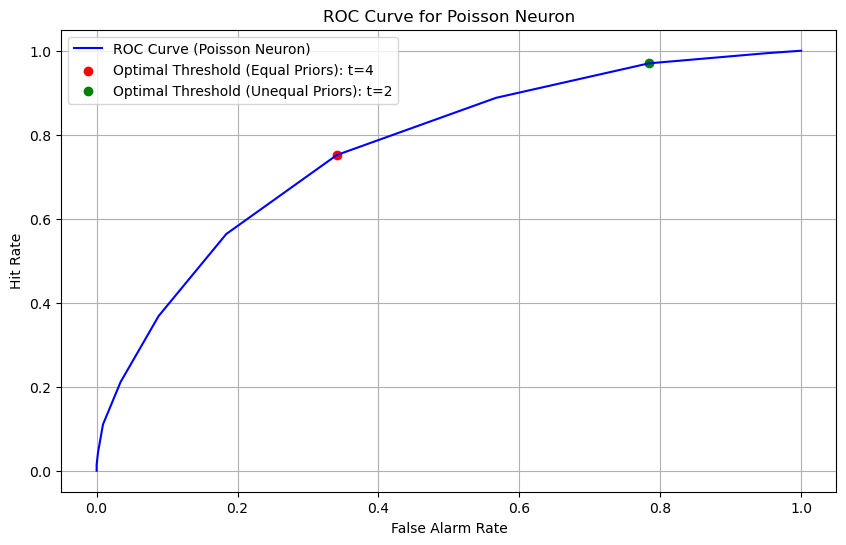

In [862]:
plt.figure(figsize=(10, 6))
plt.plot(
    false_alarm_rates_poisson,
    hit_rates_poisson,
    '-b',
    label="ROC Curve (Poisson Neuron)",
)
plt.scatter(
    false_alarm_rates_poisson[optimal_idx_equal_prior_poisson],
    hit_rates_poisson[optimal_idx_equal_prior_poisson],
    color="red",
    label=f"Optimal Threshold (Equal Priors): t={threshold_equal_prior_poisson}",
)
plt.scatter(
    false_alarm_rates_poisson[optimal_idx_unequal_prior_poisson],
    hit_rates_poisson[optimal_idx_unequal_prior_poisson],
    color="green",
    label=f"Optimal Threshold (Unequal Priors): t={threshold_unequal_prior_poisson}",
)
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
plt.title("ROC Curve for Poisson Neuron")
plt.legend()
plt.grid(True)
plt.show()

In [863]:
bin_edges_poisson = np.arange(t_min_poisson - 0.5, t_max_poisson + 1.5, 1)
counts_S1_poisson, _ = np.histogram(spike_counts_0_poisson, bins=bin_edges_poisson)
counts_S2_poisson, _ = np.histogram(spike_counts_1_poisson, bins=bin_edges_poisson)

# normalize counts
pmf_S1_equal_poisson = counts_S1_poisson * P_S1_equal / n_trials_poisson
pmf_S2_equal_poisson = counts_S2_poisson * P_S2_equal / n_trials_poisson

# adjust counts
adjusted_counts_S1_poisson = counts_S1_poisson * P_S1_unequal
adjusted_counts_S2_poisson = counts_S2_poisson * P_S2_unequal

In [864]:
pmf_S1_unequal_poisson = adjusted_counts_S1_poisson / n_trials_poisson
pmf_S2_unequal_poisson = adjusted_counts_S2_poisson / n_trials_poisson
bin_centers_poisson = bin_edges_poisson[:-1] + np.diff(bin_edges_poisson) / 2

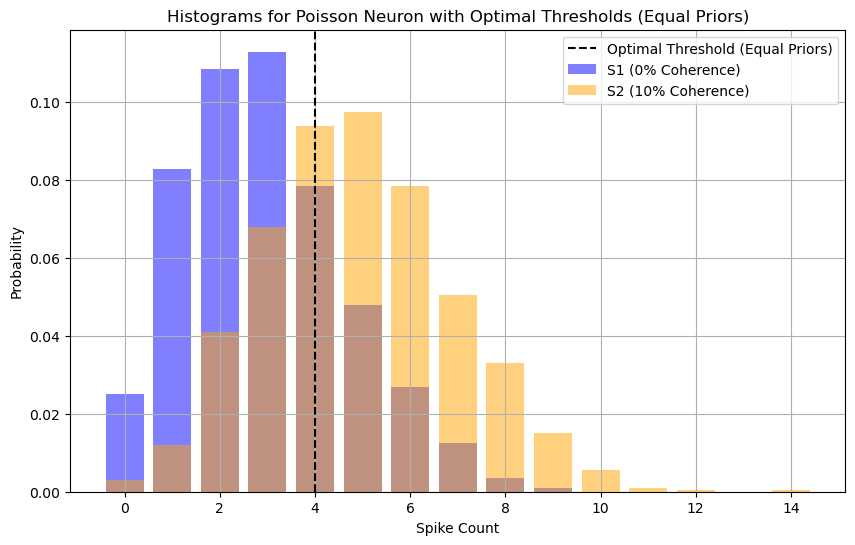

In [865]:
plt.figure(figsize=(10, 6))
plt.bar(
    bin_centers_poisson,
    pmf_S1_equal_poisson,
    color="blue",
    alpha=0.5,
    label="S1 (0% Coherence)",
)
plt.bar(
    bin_centers_poisson,
    pmf_S2_equal_poisson,
    color="orange",
    alpha=0.5,
    label="S2 (10% Coherence)",
)
plt.axvline(
    threshold_equal_prior_poisson,
    color="k",
    linestyle="--",
    label="Optimal Threshold (Equal Priors)",
)
plt.xlabel("Spike Count")
plt.ylabel("Probability")
plt.title("Histograms for Poisson Neuron with Optimal Thresholds (Equal Priors)")
plt.legend()
plt.grid(True)
plt.show()


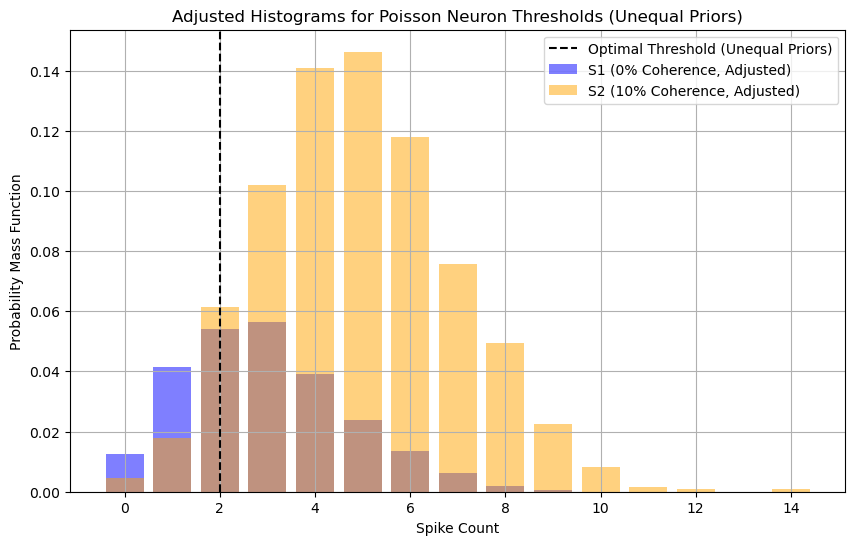

In [866]:
plt.figure(figsize=(10, 6))
plt.bar(
    bin_centers_poisson,
    pmf_S1_unequal_poisson,
    color="blue",
    alpha=0.5,
    label="S1 (0% Coherence, Adjusted)",
)
plt.bar(
    bin_centers_poisson,
    pmf_S2_unequal_poisson,
    color="orange",
    alpha=0.5,
    label="S2 (10% Coherence, Adjusted)",
)
plt.axvline(
    threshold_unequal_prior_poisson,
    color="k",
    linestyle="--",
    label="Optimal Threshold (Unequal Priors)",
)
plt.xlabel("Spike Count")
plt.ylabel("Probability Mass Function")
plt.title("Adjusted Histograms for Poisson Neuron Thresholds (Unequal Priors)")
plt.legend()
plt.grid(True)
plt.show()

In [867]:
print(f"Optimal threshold (Poisson neuron) with 50-50 prior: {threshold_equal_prior_poisson}")
print(f"Optimal threshold (Poisson neuron) with 75-25 prior: {threshold_unequal_prior_poisson}")

Optimal threshold (Poisson neuron) with 50-50 prior: 4
Optimal threshold (Poisson neuron) with 75-25 prior: 2
